> # 회귀분석 : 온도 추정하기
- ### 데이콘 온도추정 경진대회 데이터 활용

In [3]:
#a = pilimg.open('dacon.png')
#a

> ## 데이터 설명
- 대전지역에서 측정한 실내외 19곳의 센서데이터와 주변 지역의 기상청 공공데이터를 semi-비식별화하여 제공합니다. 
    - 센서는 온도를 측정하였습니다. 
    - 모든 데이터는 시간 순으로 정렬 되어 있으며 10분 단위 데이터 입니다. 
    - 예측 대상(target variable)은 Y18입니다. 


> ### train.csv 
    - 30일 간의 기상청 데이터 (X00~X39) 및 센서데이터 (Y00~Y17)
    - 이후 3일 간의 기상청 데이터 (X00~X39) 및 센서데이터 (Y18)

> ### test.csv 
    - train.csv 기간 이후 80일 간의 기상청 데이터 (X00~X39)

> ### sample_submission.csv
    - 제출 양식 예시

In [1]:
#import PIL.Image as pilimg

#b = pilimg.open('proj.png')
#b

#### 'X00','X07','X28','X31','X32' : 기온
#### "X01","X06","X22","X27","X29" : 현지기압 (실제 위치에서의 기압)
#### "X02","X03","X18","X24","X26" : 풍속
#### "X04","X10","X21","X36","X39" : 일일 누적강수량
#### "X05","X08","X09","X23","X33" : 해면기압 (높이를 같다고 가정했을 때 기압)
#### "X11","X34" : 일일 누적일사량 - X14, X16, X19는 고장
#### "X12","X20","X30","X37","X38" : 습도
#### "X13","X15","X17","X25","X35" : 풍향
#### 'Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17'  : 센서(기온)

In [9]:
#c = pilimg.open('data.png')
#c

> ## 데이터 불러오기

In [1]:
df= pd.read_csv('datas/train.csv', encoding='utf-8')

In [2]:
df

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5


In [3]:
#df.info()

In [4]:
#df.describe()

In [5]:
#df.loc[4319:4320]

In [2]:
#d = pilimg.open('model.png')
#d

In [3]:
# sensor list
sensor_list = list(df.columns[41:60])

In [4]:
hour= pd.Series((df.index%144/6).astype(int))
df['hour'] = hour

In [8]:
train_df = df[:4320]

In [9]:
train_new = train_df.drop(columns = sensor_list)
train_new

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,8.2,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0,0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,8.3,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0,0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,8.0,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0,0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,7.7,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0,0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,7.4,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,4315,19.5,987.8,1.7,0.4,0.0,1007.8,988.0,21.3,1007.8,...,18.8,19.4,1008.2,16.68,272.9,0.0,82.3,74.3,0.0,23
4316,4316,19.3,987.7,2.1,0.9,0.0,1007.8,988.1,21.3,1008.0,...,18.6,18.5,1008.4,16.68,315.9,0.0,82.4,74.8,0.0,23
4317,4317,19.5,987.8,0.9,1.3,0.0,1007.8,988.3,21.2,1008.1,...,18.4,19.1,1008.4,16.68,343.3,0.0,82.8,75.4,0.0,23
4318,4318,20.0,987.8,1.4,0.5,0.0,1007.8,988.3,21.1,1008.1,...,18.2,19.0,1008.4,16.68,341.7,0.0,82.8,75.8,0.0,23


In [11]:
train_data = pd.concat([train_new, train_df.Y00], axis=1)
train_data

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y00
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0,0,12.5
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0,0,12.5
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0,0,12.0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0,0,12.0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,4315,19.5,987.8,1.7,0.4,0.0,1007.8,988.0,21.3,1007.8,...,19.4,1008.2,16.68,272.9,0.0,82.3,74.3,0.0,23,22.0
4316,4316,19.3,987.7,2.1,0.9,0.0,1007.8,988.1,21.3,1008.0,...,18.5,1008.4,16.68,315.9,0.0,82.4,74.8,0.0,23,22.0
4317,4317,19.5,987.8,0.9,1.3,0.0,1007.8,988.3,21.2,1008.1,...,19.1,1008.4,16.68,343.3,0.0,82.8,75.4,0.0,23,21.5
4318,4318,20.0,987.8,1.4,0.5,0.0,1007.8,988.3,21.1,1008.1,...,19.0,1008.4,16.68,341.7,0.0,82.8,75.8,0.0,23,21.5


In [ ]:
#"X04","X10","X21","X36","X39" : 일일 누적강수량 차이 구해서 0(0~5) / 1(5~10) / 2(10이상) 카테고리화

## 온도 추정 선형 회귀 모델
- X 변수들 간의 다중 공선성이 강하여, 아래 3가지 모델 중, 적합한 모델 확인
- Ridge
- Lasso
- Elastic Net

### 예시) Y00 ~ X00 + ... +X39 + hour

In [12]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### 1. Ridge Regression


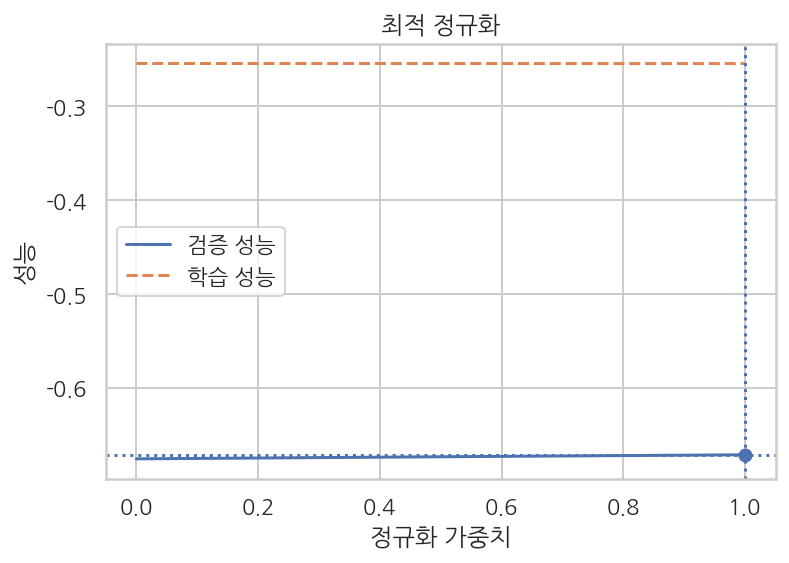

In [13]:
#교재에 있는 방법으로 alpha 구하기

%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = train_data.drop(columns = {'Y00'})
y = train_data.Y00

alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

In [15]:
optimal_alpha

1.0

#### (인터넷에서 찾은 방법) 동일한 범위에서 alpha 돌려볼때 - 위의 결과와 다르게 나온다..ㅜㅜ

In [17]:
x = train_data.drop(columns = {'Y00'})
y = train_data.Y00
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=3)
#alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [18]:
for a in alphas:
    model = Ridge(alpha=a).fit(x,y)
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0001, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0002, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0003, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0003, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.0003, R2:0.99, MSE:0.25, RMSE:0.50
Alpha:0.000

#### 1-1. run Ridge cross validation test to find the best alpha based on training data

In [19]:
ridge_cv=RidgeCV(alphas=alphas, cv=5)
model = ridge_cv.fit(xtrain, ytrain)
print(model.alpha_)

0.4552935074866948


#### 1-2. calculate Ridge R2, MSE, RMSE from test data

In [20]:
ridge=Ridge(alpha=0.5).fit(xtrain, ytrain)
ypred_ridge = ridge.predict(xtest)
score_ridge = ridge.score(xtest, ytest)
mse_ridge = mean_squared_error(ytest, ypred_ridge)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.987, MSE:0.26, RMSE:0.51


### 2. Lasso Regression
- select alpha 0.0001 by checking R2, MSE, RMSE

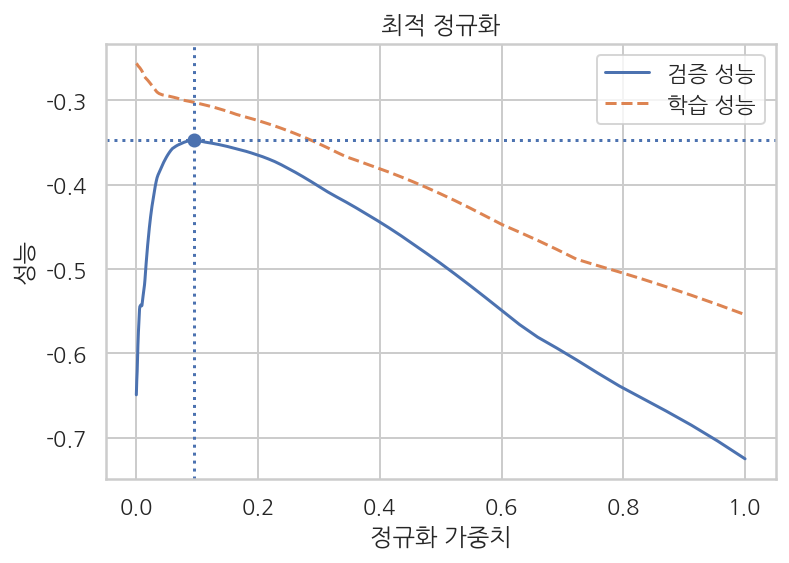

In [16]:
#교재에 있는 방법으로 alpha 구하기

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = train_data.drop(columns = {'Y00'})
y = train_data.Y00

alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

In [22]:
optimal_alpha

0.09437878277775381

#### #### (인터넷에서 찾은 방법) 동일한 범위에서 alpha 돌려볼때 - 위의 결과와 다르게 나온다..ㅜㅜ

In [23]:
for a in alphas:
    model = Lasso(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0002, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0003, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0003, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0003, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.000

#### 2-1. run Lasso cross validation test to find the best alpha based on training data

In [43]:
lasso_cv=LassoCV(alphas=alphas, cv=5)
model = lasso_cv.fit(xtrain, ytrain)
print(model.alpha_)

0.0001


In [44]:
lasso=Lasso(alpha=0.0001).fit(xtrain, ytrain)
ypred_lasso = lasso.predict(xtest)
score_lasso = lasso.score(xtest, ytest)
mse_lasso = mean_squared_error(ytest, ypred_lasso)
print("Final Result: Lasso R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))

Final Result: Lasso R2:0.987, MSE:0.27, RMSE:0.52



### 3. elasticNet Regression
- select alpha 0.0001 by checking R2, MSE, RMSE

In [45]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0010, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.0100, R2:0.99, MSE:0.26, RMSE:0.51
Alpha:0.1000, R2:0.98, MSE:0.30, RMSE:0.54
Alpha:0.3000, R2:0.98, MSE:0.33, RMSE:0.57
Alpha:0.5000, R2:0.98, MSE:0.37, RMSE:0.61
Alpha:0.7000, R2:0.98, MSE:0.43, RMSE:0.65
Alpha:1.0000, R2:0.97, MSE:0.50, RMSE:0.71


#### 3-1. run cross validation test to find the best alpha based on training data

In [24]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)

0.0001


#### 3-2. calculate R2, MSE, RMSE from test data

In [48]:
elastic=ElasticNet(alpha=0.0001).fit(xtrain, ytrain)
ypred_elasticNet = elastic.predict(xtest)
score_elasticNet = elastic.score(xtest, ytest)
mse_elasticNet = mean_squared_error(ytest, ypred_elasticNet)
print("Final Result: elasticNet R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_elasticNet, mse_elasticNet, np.sqrt(mse_elasticNet)))

Final Result: elasticNet R2:0.987, MSE:0.27, RMSE:0.52


### 4. draw a plot => select Elastic Net

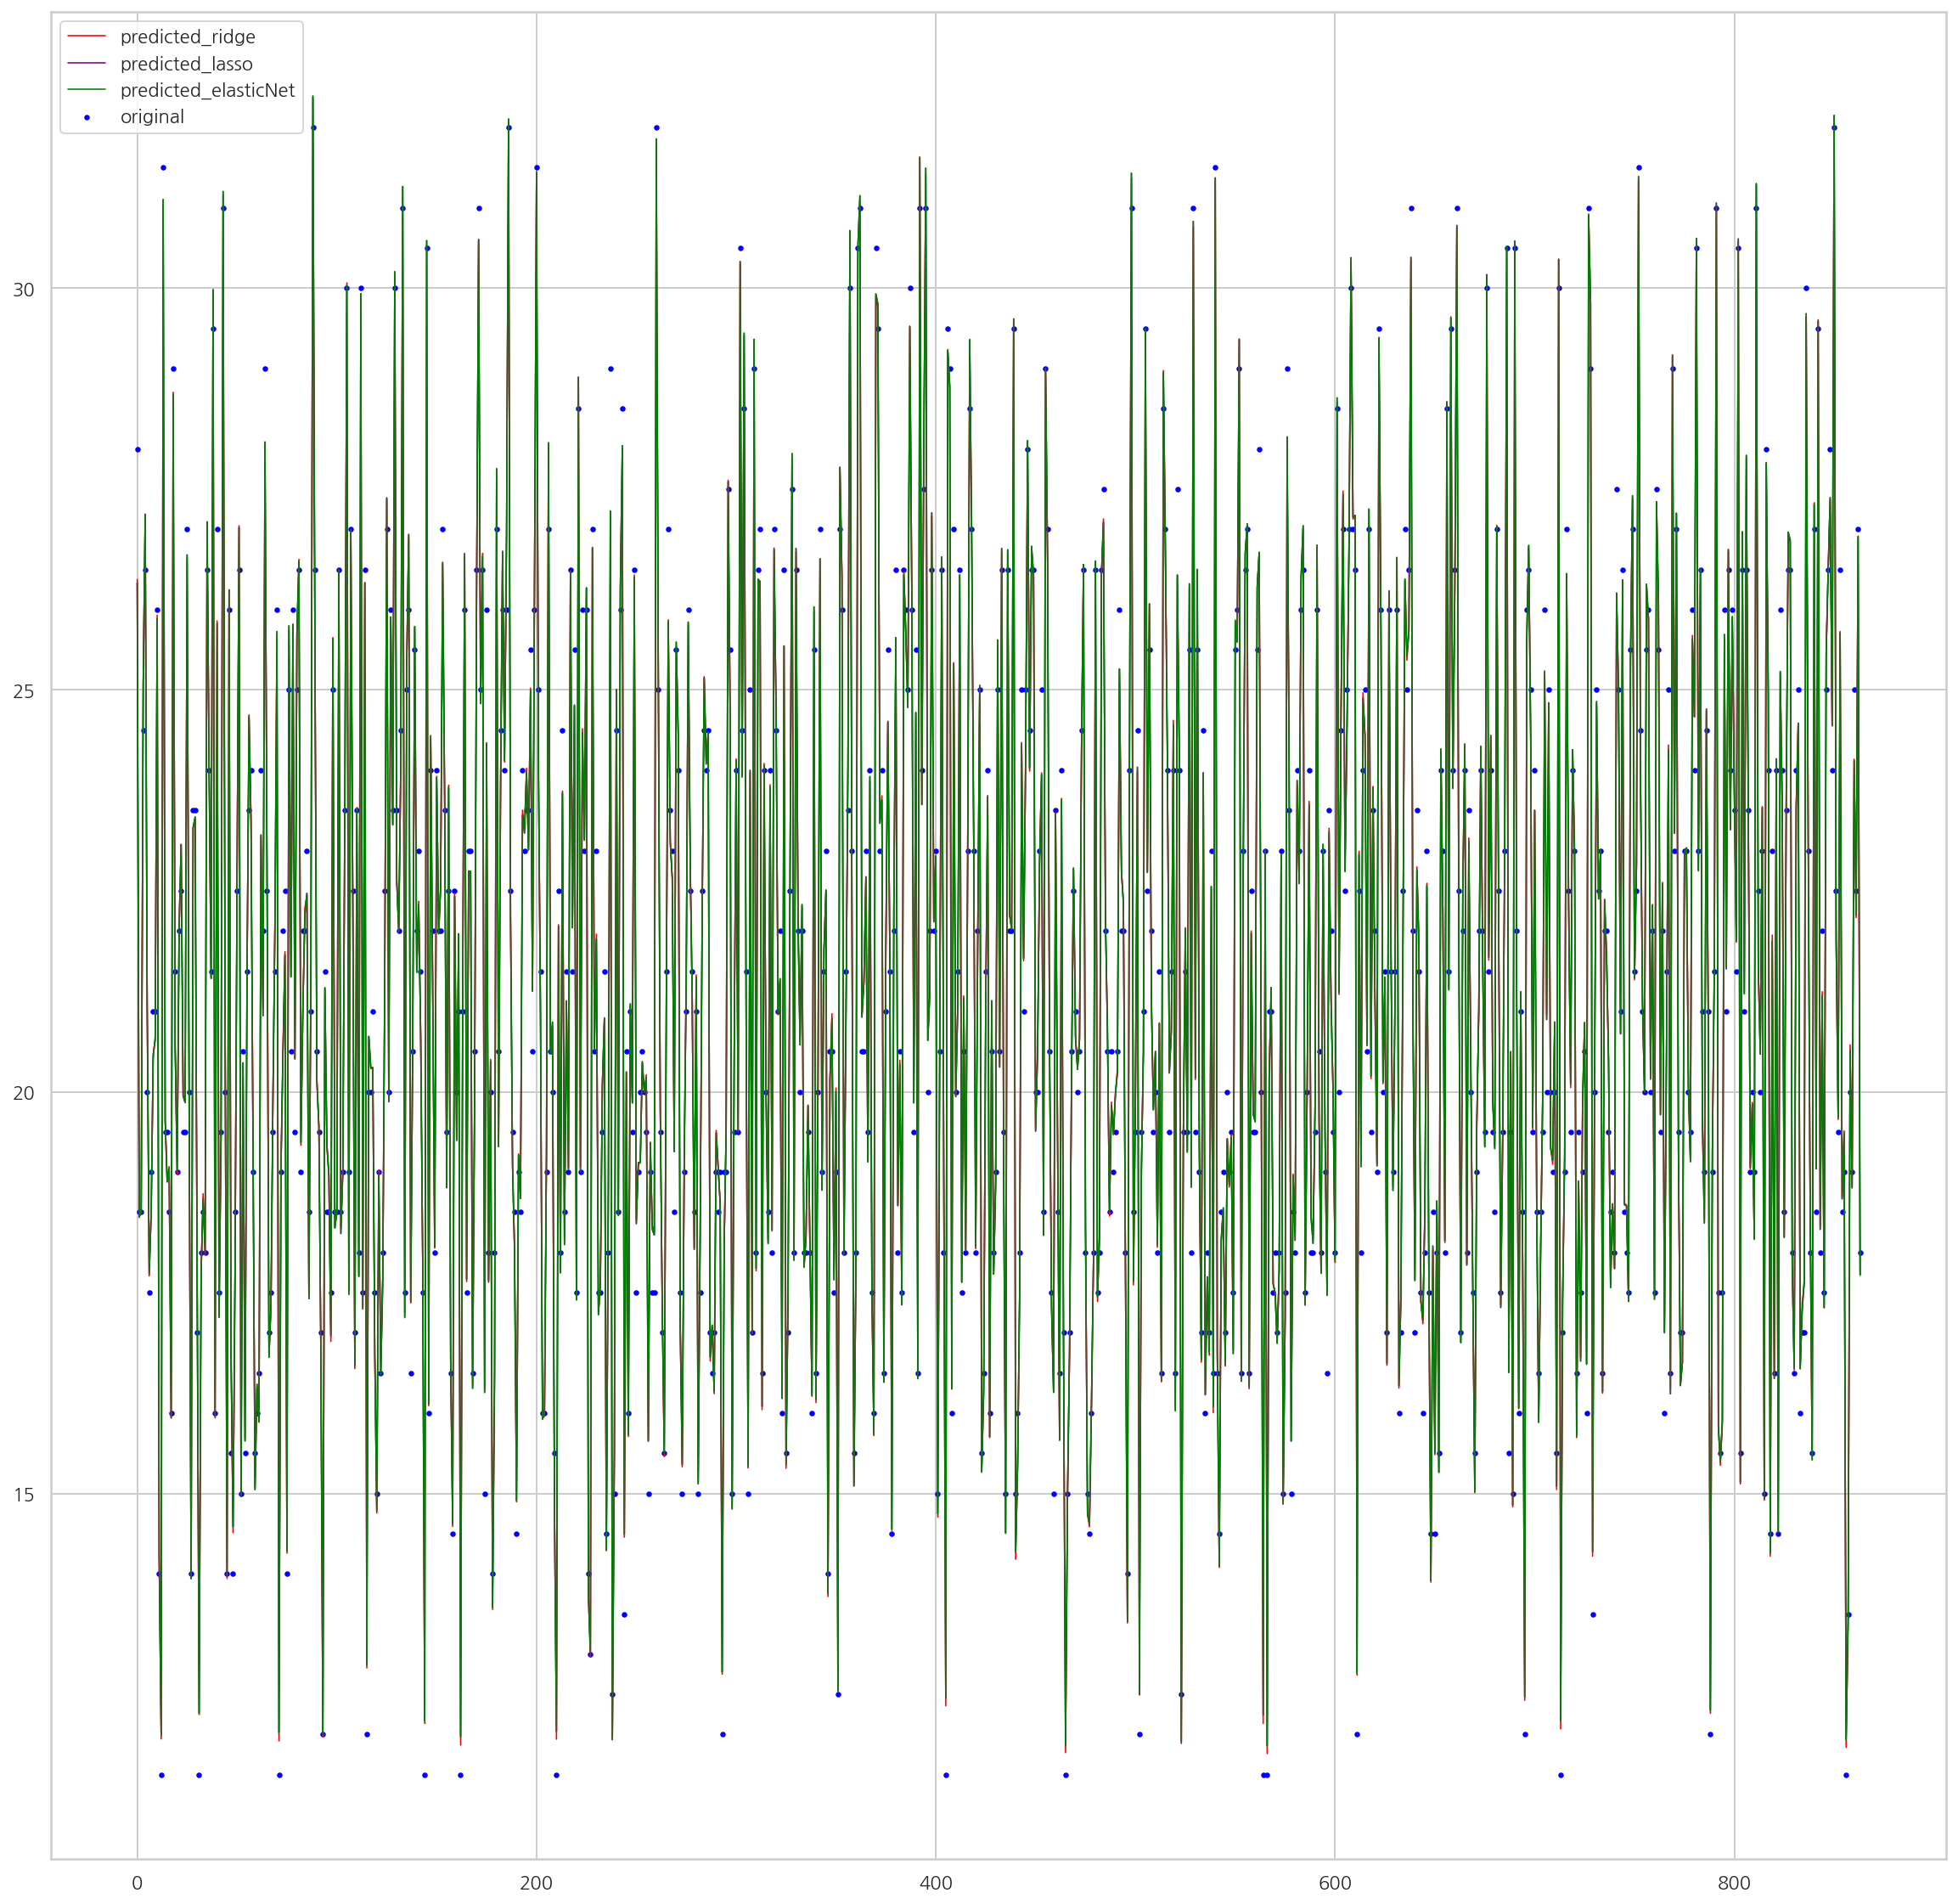

In [58]:
plt.figure(figsize= (10,10))
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred_ridge, lw=0.8, color="red", label="predicted_ridge")
plt.plot(x_ax, ypred_lasso, lw=0.8, color="purple", label="predicted_lasso")
plt.plot(x_ax, ypred_elasticNet, lw=0.8, color="green", label="predicted_elasticNet")
plt.legend()
plt.show()

In [53]:
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.987, MSE:0.26, RMSE:0.51


In [54]:
print("Final Result: Lasso R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))

Final Result: Lasso R2:0.987, MSE:0.27, RMSE:0.52


In [55]:
print("Final Result: elasticNet R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score_elasticNet, mse_elasticNet, np.sqrt(mse_elasticNet)))

Final Result: elasticNet R2:0.987, MSE:0.27, RMSE:0.52


### Ridge로 이후 3일치 Y00 예측

In [20]:
df

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18,hour
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN,0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN,0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN,0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN,0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,23
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,23
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,23
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.5,23


In [21]:
train_new1 = df.drop(columns = sensor_list)
train_new1

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,hour
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,8.2,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0,0
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,8.3,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0,0
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,8.0,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0,0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,7.7,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0,0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,7.4,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,17.7,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,23
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,17.7,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,23
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,17.8,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,23
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,17.7,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,23


In [22]:
train_data1 = pd.concat([train_new1, df.Y00], axis=1)
train_data1

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,...,X32,X33,X34,X35,X36,X37,X38,X39,hour,Y00
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,...,10.7,1010.1,0.00,256.4,0.0,77.2,62.6,0.0,0,12.5
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,...,10.3,1010.1,0.00,215.4,0.0,77.3,63.5,0.0,0,12.5
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,...,9.7,1010.0,0.00,235.2,0.0,77.3,63.9,0.0,0,12.0
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,...,9.4,1010.1,0.00,214.0,0.0,77.5,64.5,0.0,0,12.0
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,...,9.4,1010.1,0.00,174.9,0.0,78.0,65.0,0.0,0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4747,4747,19.9,987.6,0.9,0.8,0.0,1006.9,987.7,21.7,1007.5,...,19.1,1007.5,22.16,218.6,0.0,82.3,58.6,0.5,23,NaN
4748,4748,19.9,987.6,0.5,0.7,0.0,1006.8,987.7,21.6,1007.5,...,19.2,1007.5,22.16,161.7,0.0,82.5,59.1,0.5,23,NaN
4749,4749,19.7,987.7,0.9,0.6,0.0,1006.9,987.6,21.4,1007.4,...,19.2,1007.5,22.16,254.2,0.0,83.0,58.9,0.5,23,NaN
4750,4750,19.4,987.7,0.9,0.8,0.0,1006.9,987.8,21.3,1007.6,...,19.3,1007.6,22.16,300.0,0.0,83.2,59.8,0.5,23,NaN


In [ ]:
# 보완 필요